# Short Assignment 1 - Filtering in Fourier Domain

In this short assignment you'll implement DFT 2D and Inverse DFT 2D using only numpy.

<b> Use vector/matrix processing whenever possible to decrease running time </b>

The program takes as input an image filename (that must be loaded into memory) and a float number.

Implement a function that takes as input an image and a threshold value $0 < T <= 1$ This function have to:

<ul>

<li>Compute the Fourier Transform, $F$, of the image; </li>
<li>Find the second peak of the Fourier Spectrum, $p2$, i.e. the maximum not counting the coefficient 0; </li>
<li>Set to zero (0) all coefficients for which the Fourier Spectrum is (below/above?) (less than) T% of the second peak, that is, $|F|< p2 * T$ </li>
<li>Compute the Inverse Fourier Transform of the filtered version of F (after step 3 above) </li>
<li>Print on the screen the following information: $p2*T$, the number of coefficients below the threshold, the original mean of the image and the mean of the image after processing, using the following format: </li>
                                                                                                                          
</ul>

>Threshold = %.4f <br>
>Filtered Coefficients = %d <br>
>Original Mean = %.2f <br>
>New Mean = %.2f <br>

In [37]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import time
import math

### Discrete Fourier Transform

$$F(u,v) = \frac{1}{\sqrt{nm}}\sum_{x=0}^{n-1} \sum_{y=0}^{m-1} f(x,y) e^{-j 2\pi [(u x)/n + (v y)/m]}$$,

In [71]:
# Discrete Fourier Transform 
def DFT2D(f):
    # create empty array of complex coefficients
    F = np.zeros(f.shape, dtype=np.complex64)
    n,m = f.shape[0:2]
    
    # creating indices for x, to compute multiplication using numpy (f*exp)
    x = np.arange(n)
    # for each frequency 'u,v'
    for u in np.arange(n):
        for v in np.arange(m):
            for y in np.arange(m):
                F[u,v] += np.sum(f[:,y] * np.exp( (-1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) ))
    
    return F/np.sqrt(n*m)

### Inverse Discrete Fourier Transform
$$f(x,y) = \frac{1}{\sqrt{nm}}\sum_{u=0}^{n-1} \sum_{v=0}^{m-1} F(u,v) e^{j 2\pi [(u x)/n + (v y)/m]}$$

In [73]:
# Inverse Discrete Fourier Transform 
def DFT2D_inverse(F):
    f = np.zeros(F.shape, dtype=np.complex64)
    n,m = f.shape[0:2]
    
    u = np.arange(n)
   
    for x in np.arange(n):
        for y in np.arange(m):
            for v in np.arange(m):
                f[x,y] += np.sum(F[:,v] * np.exp( (1j*2*np.pi) * (((x*u)/n)+((y*v)/m)) ))
    
    return f/np.sqrt(n*m)

In [66]:
# filename = str(input()).rstrip()
# T = float(input())
T = 0.05
img = imageio.imread("moon_small.png")

In [67]:
# ------ Compute the image discrete fourier transform ------
img_FT = DFT2D(img)

(-0.5, 31.5, 31.5, -0.5)

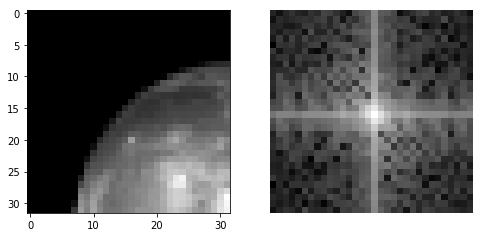

In [68]:
plt.figure(figsize=(8,8)) 
plt.subplot(121)
plt.imshow(img, cmap="gray")
# the power spectrum
plt.subplot(122)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(img_FT))), cmap="gray")
plt.axis('off')

In [131]:
img_FT_mod = np.sqrt(np.real(img_FT) ** 2 + np.imag(img_FT) ** 2) # spatial frequencies
img_p2 = np.copy(img_FT_mod) 
img_p2[0,0] = float("-inf") # frequencies array without the first peak (0,0)
p2 = np.amax(img_p2) # compute the second peak

Threshold = p2 * T

img_filt_coef = np.where(img_FT_mod > Threshold, img_FT_mod, 0) # set the values less than the threshold to 0
count_coef_gt = np.count_nonzero(img_filt_coef) # count the coefficients above the threshold
count_coef_lt = (img_FT_mod.shape[0] * img_FT_mod.shape[1]) - count_coef_gt 

# compute the mean of the original image
original_mean = np.sum(img) / (img.shape[0] * img.shape[1]) 

# ------ Compute the inverse discrete fourier transform ------
img_IFT = DFT2D_inverse(img_filt_coef)

#print(np.sum(img_filt_coef))
img_IFT_mod = np.sqrt((np.real(img_IFT) ** 2) + (np.imag(img_IFT) ** 2)) # spatial frequencies

#print(np.sum(img_IFT_mod)/count_filt_coef)

# compute the mean of the new image
new_mean = np.sum(img_IFT_mod) / (img_IFT_mod.shape[0] * img_IFT_mod.shape[1]) 

In [132]:
print("Threshold = {:.4f}".format(Threshold))
print("Filtered Coefficients = {:d}".format(count_coef_lt))
print("Original Mean = {:.2f}".format(original_mean))
print("New Mean = {:.2f}".format(new_mean))

Threshold = 33.0947
Filtered Coefficients = 900
Original Mean = 39.84
New Mean = 40.30


(-0.5, 31.5, 31.5, -0.5)

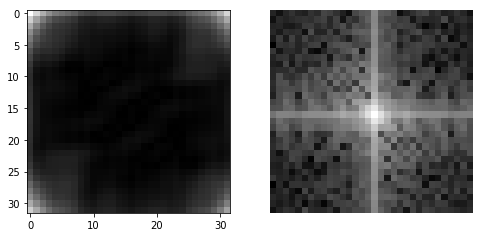

In [133]:
plt.figure(figsize=(8,8)) 
plt.subplot(121)
plt.imshow(img_IFT_mod, cmap="gray")
# the power spectrum
plt.subplot(122)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(img_FT))), cmap="gray")
plt.axis('off')

In [126]:
np.sum(img_IFT_mod)

41115.754

In [120]:
def print_img(f,g):
    n,m = f.shape
    for i in range(n):
        for j in range(m):
            print(f[i,j], "  ", g[i,j])

In [121]:
mean(img_IFT_mod)

40.1521032552846

In [122]:
print_img(img,img_IFT_mod)

0    631.97595
0    363.24167
0    262.57956
0    217.30536
0    183.90979
0    169.39066
0    155.6417
0    133.62683
0    95.76466
0    108.0162
0    95.08923
0    105.34825
0    104.15516
0    96.093216
0    89.38547
0    86.02719
0    76.4842
0    86.02719
0    89.38547
0    96.093216
0    104.15516
0    105.34825
0    95.08923
0    108.0162
0    95.76466
0    133.62683
0    155.6417
0    169.39066
0    183.90979
0    217.30536
0    262.57956
0    363.24167
0    368.45856
0    214.60216
0    168.4601
0    137.53299
0    120.1453
0    110.10532
0    105.47116
0    86.32679
0    56.243294
0    61.414757
0    49.790154
0    54.502506
0    51.678852
0    47.854725
0    49.107475
0    48.42499
0    41.6621
0    48.599422
0    49.26197
0    56.787697
0    61.801796
0    60.47657
0    52.55901
0    62.226234
0    60.022102
0    94.05102
0    104.85531
0    116.61994
0    130.23381
0    154.90115
0    189.42537
0    251.2984
0    267.69696
0    168.04057
0    138.24352
0    119.124306
0   

81    14.531563
84    15.120104
88    14.438999
90    18.298225
82    25.052946
0    62.886112
0    36.430405
0    21.367212
0    14.688185
0    15.358431
0    18.397654
0    15.498244
0    12.674194
0    4.672549
0    8.343927
0    4.6074886
33    3.1590166
50    2.7931426
55    6.057926
61    10.5178795
70    17.105322
124    19.104876
84    10.592937
77    9.98126
83    9.671665
87    3.7643867
99    0.80944544
119    1.5069864
131    0.06116415
111    0.5958502
93    4.9725184
93    13.872442
92    15.690768
98    16.976934
95    18.804316
117    25.344889
107    32.252895
0    57.509655
0    28.621916
0    19.693947
0    21.037954
0    23.816748
0    27.818441
0    29.661615
0    21.12367
0    17.485085
0    14.760562
12    8.818258
52    17.024227
56    12.736712
59    12.514501
68    16.306393
89    18.5867
93    7.8968477
89    12.710995
92    5.515138
95    0.79474807
103    1.9803519
103    6.1798925
111    9.1073065
112    0.65616876
106    2.231721
109    9.422099
104    13